In [20]:
import numpy as np
import os
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm import tqdm 
from sklearn.decomposition import PCA


In [3]:
# obtaining the files
image_dir = 'train/new'
file_list = os.listdir(image_dir)

# Extract labels from file names (assuming filenames are in the format "cat.xxx.jpg" or "dog.xxx.jpg")
labels = [file.split('.')[0] for file in file_list]

In [4]:
def load_data(image_path):
    image = Image.open(image_path)
    return image

In [6]:
def extract_features(image_path):
    image = Image.open(image_path)
    image = image.resize((100, 100))
    image_array = np.array(image).flatten()
    return image_array

In [24]:
#loading Data
D = []

for file in tqdm(file_list, desc="Loading data"):
    image_path = os.path.join(image_dir, file)
    D.append(load_data(image_path))
print(D)

#printing the paths to ensure data has been loaded

Loading data: 100%|██████████| 5000/5000 [00:00<00:00, 16243.58it/s]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x208B177C2D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x280 at 0x208B177C190>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=489x499 at 0x208B177C4D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=403x499 at 0x208B177C390>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x149 at 0x208B177C590>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x499 at 0x208B177C7D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=379x407 at 0x208B177C950>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=259x269 at 0x208B177C650>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x208B177C9D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x208B177C990>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x375 at 0x208B177C8D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374 at 0x208B177CC50>, <PIL.JpegImageP

In [23]:
# Load images and extract features
X = []

for file in tqdm(file_list, desc="Extracting Features"):
    image_path = os.path.join(image_dir, file)
    X.append(extract_features(image_path))

X = np.array(X)

print(X)

Extracting Features: 100%|██████████| 5000/5000 [00:08<00:00, 600.00it/s]

[[205 166  89 ...   2   2   0]
 [ 40  45  42 ...  45  33  25]
 [ 29  34  43 ... 175 171   7]
 ...
 [164 146 132 ... 124 106  92]
 [ 64  92  41 ...  86 111  59]
 [127 140 155 ... 217 179 185]]


In [22]:
X.shape

(5000, 1000)

In [17]:

n_components = 1000 

#Using Principle component analysis for dimentionality reduction, faster processing
pca = PCA(n_components=n_components)

# Fit PCA to your feature matrix X and transform it
X_pca = pca.fit_transform(X)

print("Original shape of X:", X.shape)
print("Shape of X after PCA:", X_pca.shape)

print("Explained variance ratio:", pca.explained_variance_ratio_)

X = X_pca

Original shape of X: (5000, 30000)
Shape of X after PCA: (5000, 1000)
Explained variance ratio: [1.90575609e-01 1.04645142e-01 7.48801199e-02 6.01521797e-02
 3.10941524e-02 2.84578639e-02 2.30111980e-02 2.01635159e-02
 1.76496280e-02 1.74919135e-02 1.42788331e-02 1.29204802e-02
 1.17232207e-02 1.04088144e-02 8.44720898e-03 8.31047012e-03
 7.77285729e-03 7.14610558e-03 6.79763062e-03 6.18532221e-03
 5.95337101e-03 5.30837895e-03 5.04298591e-03 4.91967014e-03
 4.73468275e-03 4.64873165e-03 4.26281543e-03 4.14204342e-03
 3.96518717e-03 3.87149328e-03 3.73190742e-03 3.60918337e-03
 3.54205827e-03 3.44903197e-03 3.37336163e-03 3.30143165e-03
 3.20809210e-03 3.07987245e-03 2.89296074e-03 2.77007675e-03
 2.70913964e-03 2.67718740e-03 2.61116657e-03 2.43062040e-03
 2.34424967e-03 2.29416616e-03 2.26213065e-03 2.19906318e-03
 2.14956558e-03 2.12278572e-03 2.03078691e-03 1.97373366e-03
 1.92739900e-03 1.90533257e-03 1.83023867e-03 1.81222223e-03
 1.74556778e-03 1.72579161e-03 1.69047101e-03 1.62

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
print("Data splitting completed.")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling completed.")


svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)
print("Model training completed.")


y_pred = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Data splitting completed.
Feature scaling completed.
Model training completed.
Accuracy: 0.568


In [34]:
import pandas as pd
pd.Series(y_train).value_counts()

dog    2000
cat    2000
Name: count, dtype: int64

In [35]:
import pandas as pd
pd.Series(y_test).value_counts()

cat    500
dog    500
Name: count, dtype: int64

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cat       0.56      0.59      0.58       500
         dog       0.57      0.54      0.56       500

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.57      0.57      0.57      1000



[[297 203]
 [229 271]]


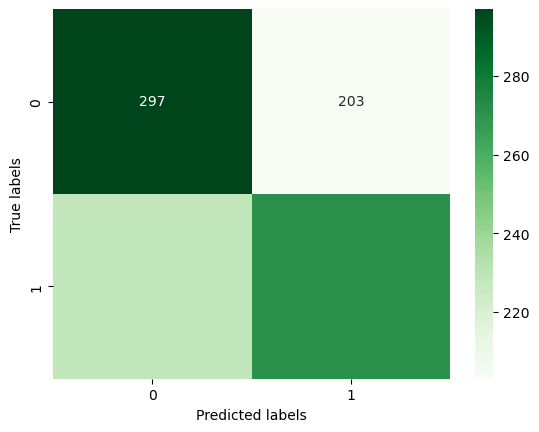

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()